In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
!unzip "/content/drive/MyDrive/label55.zip" -d "/content/drive/MyDrive/"


流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/drive/MyDrive/label55/fear/juan-gris_compotier-carafe-and-open-book.jpg  
  inflating: /content/drive/MyDrive/__MACOSX/label55/fear/._juan-gris_compotier-carafe-and-open-book.jpg  
  inflating: /content/drive/MyDrive/label55/fear/amedeo-modigliani_bust-of-a-young-woman.jpg  
  inflating: /content/drive/MyDrive/__MACOSX/label55/fear/._amedeo-modigliani_bust-of-a-young-woman.jpg  
  inflating: /content/drive/MyDrive/label55/fear/gerard-sekoto_police-man-on-a-white-horse-in-the-fields-1959.jpg  
  inflating: /content/drive/MyDrive/__MACOSX/label55/fear/._gerard-sekoto_police-man-on-a-white-horse-in-the-fields-1959.jpg  
  inflating: /content/drive/MyDrive/label55/fear/walter-battiss_bathers-in-a-landscape.jpg  
  inflating: /content/drive/MyDrive/__MACOSX/label55/fear/._walter-battiss_bathers-in-a-landscape.jpg  
  inflating: /content/drive/MyDrive/label55/fear/vincent-van-gogh_self-portrait-1886-1.jpg  
  inflating: /content/drive/MyDrive/

In [7]:
# count number of images for each emotional label
import os

# Adjust this path to where the dataset has been unzipped
data_dir = '/content/drive/MyDrive/label55'

# Initialize a dictionary to hold the count of images for each label
emotions_count = {}

# Loop through each subdirectory in the dataset directory
for subdir in os.listdir(data_dir):
    # Construct the path to the subdirectory
    subdir_path = os.path.join(data_dir, subdir)

    # Ensure the path is indeed a directory
    if os.path.isdir(subdir_path):
        # List all files in the subdirectory
        files = os.listdir(subdir_path)
        # Count the number of files, assuming each file is an image
        emotions_count[subdir] = len([file for file in files if os.path.isfile(os.path.join(subdir_path, file))])

# Print the count of images for each label
for emotion, count in emotions_count.items():
    print(f"{emotion}: {count} images")



excitement: 369 images
awe: 671 images
fear: 389 images
sadness: 446 images
contentment: 1260 images
anger: 73 images
amusement: 435 images
disgust: 213 images


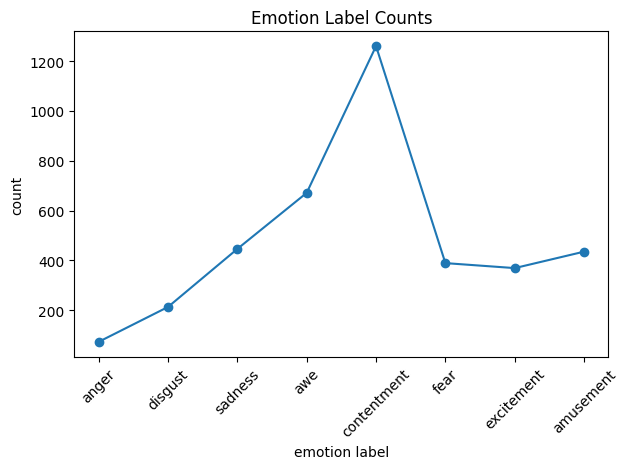

In [ ]:
# plot the count for each emotional label
import matplotlib.pyplot as plt
import numpy as np

emotion_counts = {
    'anger': 73,
    'disgust': 213,
    'sadness': 446,
    'awe': 671,
    'contentment': 1260,
    'fear': 389,
    'excitement': 369,
    'amusement': 435
}

# Extracting the labels and counts for plotting
labels = list(emotion_counts.keys())
counts = list(emotion_counts.values())

# Plotting the line chart
plt.plot(labels, counts, marker='o')

plt.xlabel('emotion label')
plt.ylabel('count')
plt.title('Emotion Label Counts')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



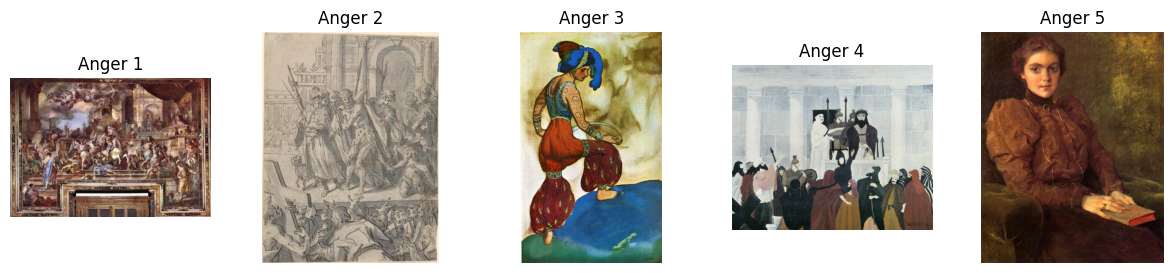

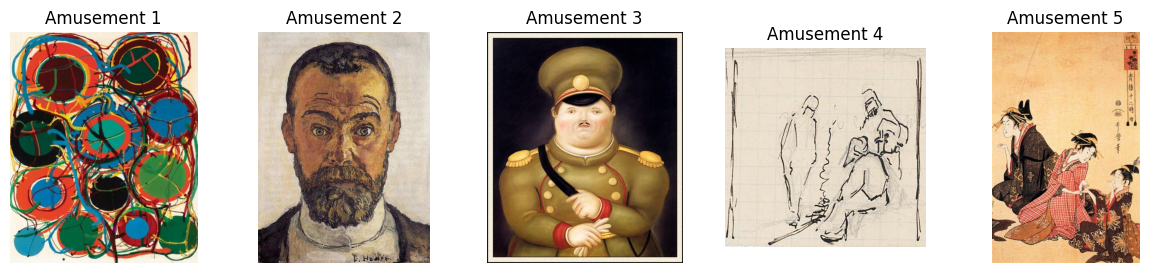

In [ ]:
# display 5 images from two emotion categories

import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img

# Define the paths to the two subfolders
subfolder_path_1 = '/content/drive/MyDrive/label55/anger/'
subfolder_path_2 = '/content/drive/MyDrive/label55/amusement/'

# Get the list of image file names in each subfolder
image_files_1 = os.listdir(subfolder_path_1)[:5]  # Only get the first 5 images
image_files_2 = os.listdir(subfolder_path_2)[:5]  # Only get the first 5 images

# Display the images in subfolder 1
plt.figure(figsize=(15, 3))
for i, image_file in enumerate(image_files_1):
    img = load_img(os.path.join(subfolder_path_1, image_file))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f'Anger {i+1}')
    plt.axis('off')
plt.show()

# Display the images in subfolder 2
plt.figure(figsize=(15, 3))
for i, image_file in enumerate(image_files_2):
    img = load_img(os.path.join(subfolder_path_2, image_file))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f'Amusement {i+1}')
    plt.axis('off')
plt.show()


In [8]:
# train test split
import os
from sklearn.model_selection import train_test_split

def get_images_from_folder(folder_path):
    images = []
    labels = []
    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            for image in os.listdir(class_dir):
                if image.lower().endswith(('.png', '.jpg', '.jpeg')):
                    images.append(os.path.join(class_dir, image))
                    labels.append(class_name)
    return images, labels

def train_val_test_split(images, labels, test_size=0.3, val_size=0.5):
    # First split for training and temporary test set
    train_images, temp_test_images, train_labels, temp_test_labels = train_test_split(
        images, labels, test_size=test_size, random_state=42, stratify=labels)

    # Second split for dividing the temporary test set into test and validation
    test_images, val_images, test_labels, val_labels = train_test_split(
        temp_test_images, temp_test_labels, test_size=val_size, random_state=42, stratify=temp_test_labels)

    return train_images, test_images, val_images, train_labels, test_labels, val_labels

# Path to your dataset
dataset_path = '/content/drive/MyDrive/label55'

# Get images and labels
images, labels = get_images_from_folder(dataset_path)

# Perform the split
train_images, test_images, val_images, train_labels, test_labels, val_labels = train_val_test_split(images, labels)

# Example: Print the counts to verify
print("Training set size:", len(train_images))
print("Test set size:", len(test_images))
print("Validation set size:", len(val_images))


Training set size: 2693
Test set size: 577
Validation set size: 578


In [9]:
# create train, test, val subfolders
import os
import shutil

# Define base directories
base_dir = '/content/drive/MyDrive/label55'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)
    for class_name in os.listdir(base_dir):
        # Check if it's a directory and not a file
        if os.path.isdir(os.path.join(base_dir, class_name)):
            os.makedirs(os.path.join(directory, class_name), exist_ok=True)

# Function to move images
def move_images(image_paths, destination):
    for image_path in image_paths:
        # Extract the class name from the path
        class_name = image_path.split(os.sep)[-2]
        # Define the destination path
        dest_path = os.path.join(destination, class_name, os.path.basename(image_path))
        # Move the image
        shutil.move(image_path, dest_path)

# Move the images to their respective directories
move_images(train_images, train_dir)
move_images(val_images, val_dir)
move_images(test_images, test_dir)

print("Dataset successfully organized into train, val, and test directories.")


Dataset successfully organized into train, val, and test directories.


In [10]:
import os
import shutil

# Define base directories
base_dir = '/content/drive/MyDrive/label55'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [11]:
base_dir = '/content/drive/MyDrive/label55'
train_dir = '/content/drive/MyDrive/label55/train'
val_dir ='/content/drive/MyDrive/label55/val'
test_dir = '/content/drive/MyDrive/label55/test'

In [12]:
import os

#count images for each class in the training set
def count_images_per_class(directory):
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')
    class_image_counts = {}

    for class_dir in os.listdir(directory):
        full_path = os.path.join(directory, class_dir)
        if os.path.isdir(full_path) and not class_dir.startswith('.'):
            # Count only image files within the current class directory
            num_images = len([f for f in os.listdir(full_path) if f.lower().endswith(image_extensions)])
            class_image_counts[class_dir] = num_images

    return class_image_counts

# Example train directory path
train_dir = '/content/drive/MyDrive/label55/train'

# Count images per class in the training directory
train_image_class_counts = count_images_per_class(train_dir)
print(train_image_class_counts)


{'excitement': 258, 'awe': 469, 'fear': 272, 'sadness': 311, 'contentment': 881, 'anger': 50, 'amusement': 304, 'disgust': 148}


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import shutil
import os
import math

# Data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.3,
    height_shift_range=0.3,
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to augment images evenly across the class to reach the target count
def augment_class_to_target(class_name, target_count, datagen, original_images_path, save_to_path):
    class_dir = os.path.join(original_images_path, class_name)
    image_files = [f for f in os.listdir(class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    save_dir = os.path.join(save_to_path, class_name)

    # Ensure the save directory exists
    os.makedirs(save_dir, exist_ok=True)

    current_count = len(image_files)
    n_required = target_count - current_count

    if n_required <= 0:
        return 0

    # Determine the average number of augmentations needed per image
    augment_per_image = math.ceil(n_required / current_count)

    n_generated = 0

    for image_file in image_files:
        file_path = os.path.join(class_dir, image_file)
        img = load_img(file_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate the specified number of augmentations for each image
        for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix=f"{class_name}_{os.path.splitext(image_file)[0]}", save_format='jpeg'):
            n_generated += 1
            if n_generated >= n_required:
                break  # Stop once we reach the total required count
            if n_generated % augment_per_image == 0:
                break

    return n_generated

# Define the emotion labels and target counts
emotion_labels = {
    'anger': {'current': 50, 'target': 500},
    'disgust': {'current': 148, 'target': 500},
    'sadness': {'current': 311, 'target': 500},
    'awe': {'current': 469, 'target': 500},
    'contentment': {'current': 881, 'target': 881},
    'fear': {'current': 272, 'target': 500},
    'excitement': {'current': 258, 'target': 500},
    'amusement': {'current': 304, 'target': 500}
}

original_images_path = '/content/drive/MyDrive/label55/train'
save_to_path = '/content/drive/MyDrive/label55/train'

# Ensure that "contentment" is completely copied to the target path
contentment_src = os.path.join(original_images_path, 'contentment')
contentment_dest = os.path.join(save_to_path, 'contentment')
if not os.path.exists(contentment_dest):
    shutil.copytree(contentment_src, contentment_dest)

# Perform augmentation for each emotion class
for emotion, counts in emotion_labels.items():
    if emotion != 'contentment' and counts['current'] < counts['target']:
        n_generated = augment_class_to_target(emotion, counts['target'], datagen, original_images_path, save_to_path)
        print(f"Generated {n_generated} new images for class '{emotion}'.")
    else:
        print(f"No augmentation needed for class '{emotion}'.")


Generated 450 new images for class 'anger'.
Generated 382 new images for class 'disgust'.
Generated 311 new images for class 'sadness'.
Generated 469 new images for class 'awe'.
No augmentation needed for class 'contentment'.
Generated 272 new images for class 'fear'.
Generated 258 new images for class 'excitement'.
Generated 304 new images for class 'amusement'.


<ipython-input-14-eefb43bed19e>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=10)


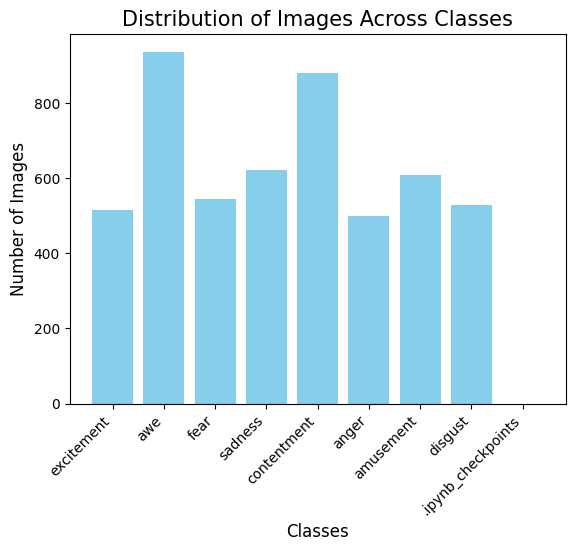

In [14]:
import os
import matplotlib.pyplot as plt

# Count images for training set after data augmentation
base_dir = '/content/drive/MyDrive/label55/train'
classes = os.listdir(base_dir)
class_image_counts = {}

# Iterate over each class/subdirectory to count images
for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)
    if os.path.isdir(class_dir):
        image_files = [file for file in os.listdir(class_dir) if file.endswith(('.png', '.jpg', '.jpeg'))]
        class_image_counts[class_name] = len(image_files)

# Plotting the distribution of images in classes
fig, ax = plt.subplots()
class_names = list(class_image_counts.keys())
image_counts = list(class_image_counts.values())
ax.bar(class_names, image_counts, color='skyblue')
ax.set_xlabel('Classes', fontsize=12)
ax.set_ylabel('Number of Images', fontsize=12)
ax.set_title('Distribution of Images Across Classes', fontsize=15)
ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=10)
plt.show()


58889256/58889256 [==============================] - 0s 0us/step
Found 5139 images belonging to 8 classes.
Found 578 images belonging to 8 classes.
Epoch 1/50
80/80 [==============================] - 58s 600ms/step - loss: 51.6087 - accuracy: 0.1602 - val_loss: 48.4564 - val_accuracy: 0.2743
Epoch 2/50
80/80 [==============================] - 49s 606ms/step - loss: 45.9348 - accuracy: 0.2134 - val_loss: 43.2800 - val_accuracy: 0.2917
Epoch 3/50
80/80 [==============================] - 49s 608ms/step - loss: 40.9866 - accuracy: 0.2351 - val_loss: 38.6257 - val_accuracy: 0.3056
Epoch 4/50
80/80 [==============================] - 48s 605ms/step - loss: 36.6101 - accuracy: 0.2534 - val_loss: 34.4677 - val_accuracy: 0.3177
Epoch 5/50
80/80 [==============================] - 48s 594ms/step - loss: 32.6656 - accuracy: 0.2680 - val_loss: 30.8161 - val_accuracy: 0.3056
Epoch 6/50
80/80 [==============================] - 47s 586ms/step - loss: 29.1983 - accuracy: 0.2802 - val_loss: 27.5608 - val

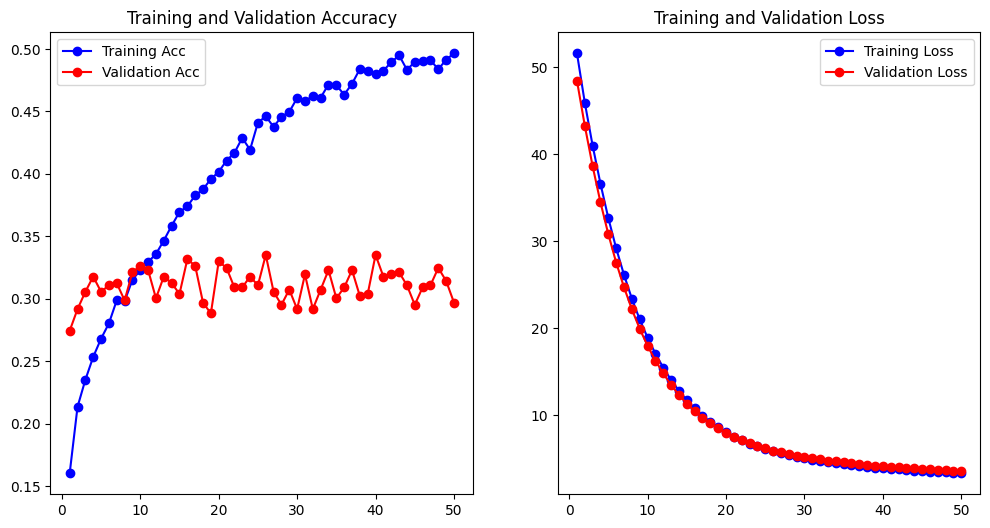

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import os
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Adding custom top layers for our specific dataset
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax', kernel_regularizer=regularizers.l2(0.1))
])

# Setup learning rate schedule using ExponentialDecay
initial_learning_rate = 1e-5
learning_rate_decay = 1e-8
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=100000,
    decay_rate=1 - learning_rate_decay,
    staircase=True)

# Compile the model using the Adam optimizer with the learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

# Function to generate data excluding system folders like `.ipynb_checkpoints`
def generator_without_checkpoints(base_dir, target_size, batch_size, class_mode):
    subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and not d.startswith('.')]
    return ImageDataGenerator(rescale=1./255).flow_from_directory(
        base_dir,
        classes=subdirectories,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )

# Example Usage
train_generator = generator_without_checkpoints(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

val_generator = generator_without_checkpoints(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping]
)

# Function to plot the training and validation loss and accuracy
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Plot the history
plot_history(history)


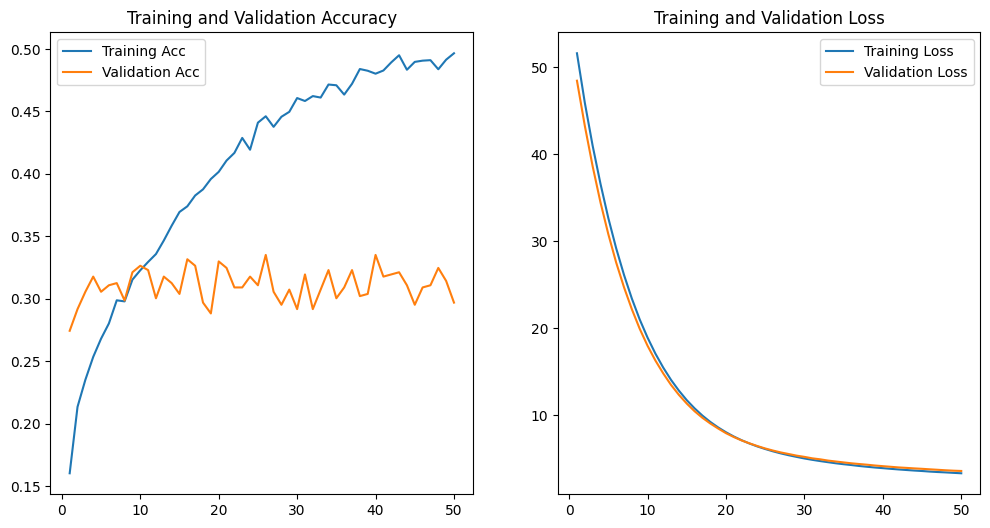

In [16]:
# Function to plot the training and validation loss and accuracy
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Acc')
    plt.plot(epochs, val_acc, label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Plot the history
plot_history(history)

In [17]:
#accuracy on test set

test_dir = '/content/drive/MyDrive/label55/test'
test_generator = generator_without_checkpoints(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

# Evaluate the Model on the Test Dataset
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 577 images belonging to 8 classes.
9/9 [==============================] - 5s 530ms/step - loss: 3.6160 - accuracy: 0.3056
Test Loss: 3.6160006523132324
Test Accuracy: 0.3055555522441864


10/10 [==============================] - 5s 511ms/step


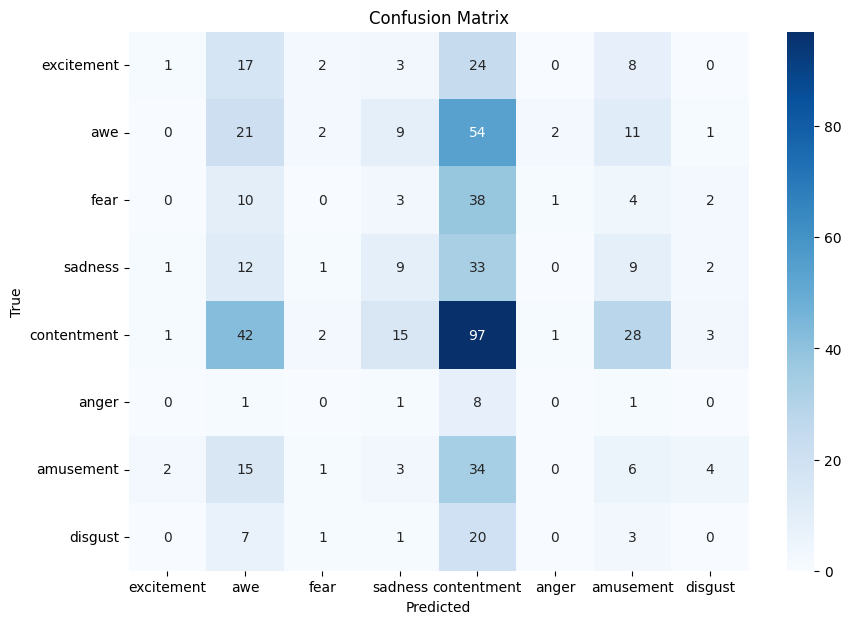

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

2/2 [==============================] - 3s 18ms/step


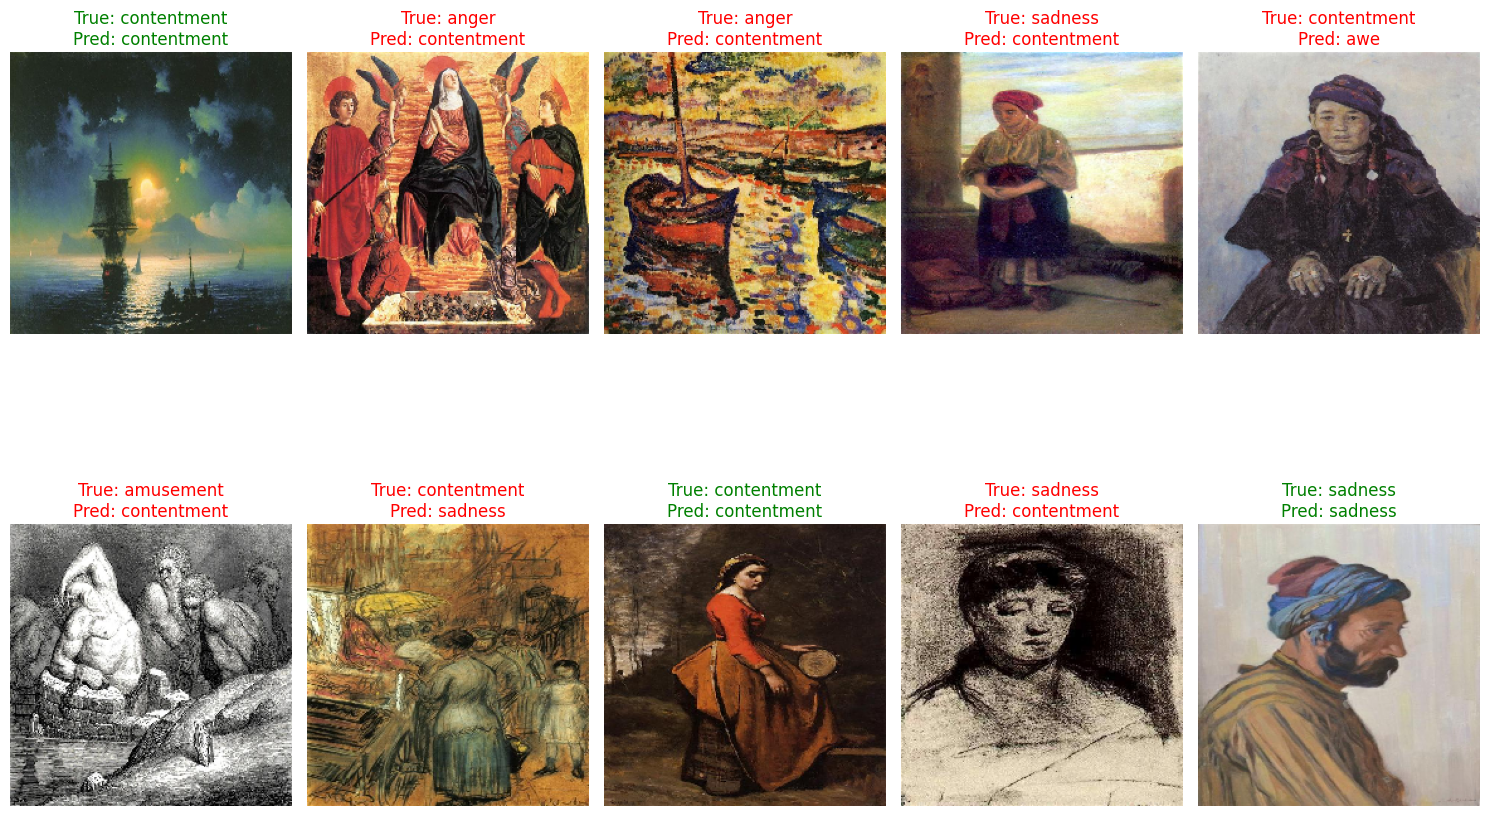

In [20]:
import matplotlib.pyplot as plt
import numpy as np

class_indices = {v: k for k, v in val_generator.class_indices.items()}

# Function to plot images, true labels, and model predictions
def plot_images_predictions(model, generator, class_indices, num_images=5):
    # Get a batch of images and labels
    for images, labels in generator:
        break  # We only need the first batch here

    # Make predictions
    preds = model.predict(images)
    pred_labels = np.argmax(preds, axis=1)

    # Plot the images, true labels, and predictions
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(num_images // 5 + 1, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_indices[labels[i]]
        predicted_label = class_indices[pred_labels[i]]
        color = 'green' if true_label == predicted_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images_predictions(model, val_generator, class_indices, num_images=10)

94765736/94765736 [==============================] - 1s 0us/step
Found 5139 images belonging to 8 classes.
Found 578 images belonging to 8 classes.
Epoch 1/20
80/80 [==============================] - 51s 559ms/step - loss: 48.0404 - accuracy: 0.1598 - val_loss: 41.3274 - val_accuracy: 0.2812
Epoch 2/20
80/80 [==============================] - 46s 572ms/step - loss: 36.2357 - accuracy: 0.1815 - val_loss: 31.3784 - val_accuracy: 0.1615
Epoch 3/20
80/80 [==============================] - 52s 648ms/step - loss: 27.5564 - accuracy: 0.1947 - val_loss: 23.9052 - val_accuracy: 0.2587
Epoch 4/20
80/80 [==============================] - 46s 578ms/step - loss: 21.1191 - accuracy: 0.2022 - val_loss: 18.3946 - val_accuracy: 0.1701
Epoch 5/20
80/80 [==============================] - 47s 592ms/step - loss: 16.3257 - accuracy: 0.1900 - val_loss: 14.2726 - val_accuracy: 0.2257
Epoch 6/20
80/80 [==============================] - 47s 582ms/step - loss: 12.7942 - accuracy: 0.2016 - val_loss: 11.3020 - val

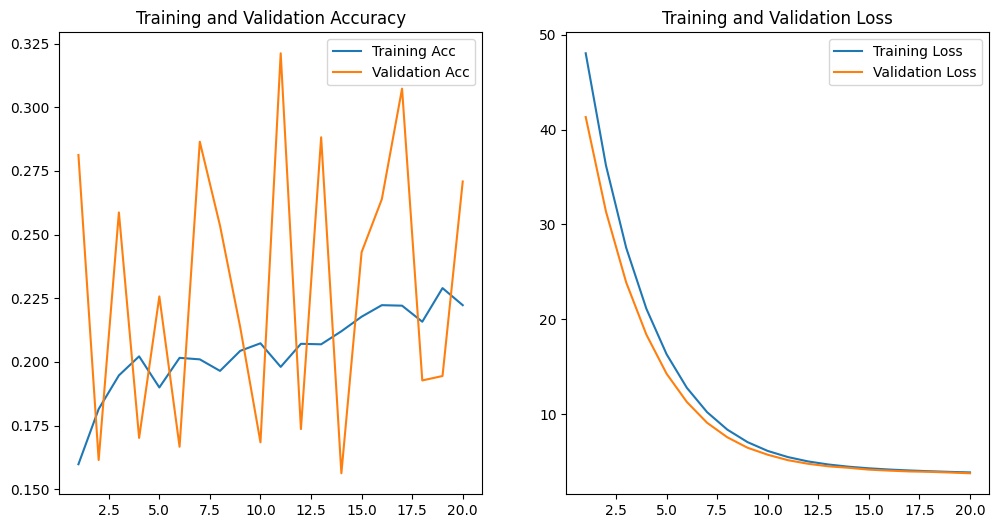

In [25]:
#train with ResNet50

from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os

# Load the ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Adding custom top layers for our specific dataset
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(0.1)),  # L2 regularization for the dense layer
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax',
                 kernel_regularizer=regularizers.l2(0.1))  # L2 regularization for the output layer
])

# Setup learning rate schedule using ExponentialDecay
initial_learning_rate = 1e-5
learning_rate_decay = 1e-8
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=100000,
    decay_rate=1 - learning_rate_decay,
    staircase=True)

# Compile the model using the Adam optimizer with the learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Function to generate data excluding system folders like `.ipynb_checkpoints`
def generator_without_checkpoints(base_dir, target_size, batch_size, class_mode):
    # Filter directories excluding `.ipynb_checkpoints`
    subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and not d.startswith('.')]
    return ImageDataGenerator(rescale=1./255).flow_from_directory(
        base_dir,
        classes=subdirectories,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )

# Example Usage
train_generator = generator_without_checkpoints(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

val_generator = generator_without_checkpoints(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Function to plot the training and validation loss and accuracy
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Acc')
    plt.plot(epochs, val_acc, label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Plot the history
plot_history(history)

In [26]:
#accuracy on test set

test_dir = '/content/drive/MyDrive/label55/test'
test_generator = generator_without_checkpoints(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

# Evaluate the Model on the Test Dataset
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 577 images belonging to 8 classes.
9/9 [==============================] - 6s 595ms/step - loss: 3.7874 - accuracy: 0.2951
Test Loss: 3.787356376647949
Test Accuracy: 0.2951388955116272


In [ ]:
#ml classifiers on fc6, 7, 8
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import tensorflow as tf
import os

# Load the base model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Define L2 regularization factor
l2_factor = 0.1

# Create models to extract features from fc6, fc7, and fc8 with L2 regularization
feature_model_fc6 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu', name='fc6', kernel_regularizer=regularizers.l2(l2_factor))
])

feature_model_fc7 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu', name='fc6', kernel_regularizer=regularizers.l2(l2_factor)),
    layers.Dense(4096, activation='relu', name='fc7', kernel_regularizer=regularizers.l2(l2_factor))
])

feature_model_fc8 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu', name='fc6', kernel_regularizer=regularizers.l2(l2_factor)),
    layers.Dense(4096, activation='relu', name='fc7', kernel_regularizer=regularizers.l2(l2_factor)),
    layers.Dense(1000, activation='relu', name='fc8', kernel_regularizer=regularizers.l2(l2_factor))
])

# Compile the models
for model in [feature_model_fc6, feature_model_fc7, feature_model_fc8]:
    model.compile(optimizer='adam', loss='mse')

# Function to generate data excluding system folders like `.ipynb_checkpoints`
def generator_without_checkpoints(base_dir, target_size, batch_size, class_mode):
    subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and not d.startswith('.')]
    return ImageDataGenerator(rescale=1./255).flow_from_directory(
        base_dir,
        classes=subdirectories,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )

# Create data generators using the generator_without_checkpoints function
train_generator = generator_without_checkpoints(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

val_generator = generator_without_checkpoints(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

# Function to extract features and labels from a generator
def extract_features(generator, model):
    features = []
    labels = []
    for i in range(len(generator)):
        x_batch, y_batch = next(generator)
        batch_features = model.predict(x_batch)
        features.extend(batch_features)
        labels.extend(y_batch)
    return np.array(features), np.array(labels)

# Extract features from fc6, fc7, and fc8
train_features_fc6, train_labels_fc6 = extract_features(train_generator, feature_model_fc6)
val_features_fc6, val_labels_fc6 = extract_features(val_generator, feature_model_fc6)

train_features_fc7, train_labels_fc7 = extract_features(train_generator, feature_model_fc7)
val_features_fc7, val_labels_fc7 = extract_features(val_generator, feature_model_fc7)

train_features_fc8, train_labels_fc8 = extract_features(train_generator, feature_model_fc8)
val_features_fc8, val_labels_fc8 = extract_features(val_generator, feature_model_fc8)

# Concatenate features from all three layers for training
train_features_combined = np.hstack([train_features_fc6, train_features_fc7, train_features_fc8])
val_features_combined = np.hstack([val_features_fc6, val_features_fc7, val_features_fc8])

# Train classifiers (replace or add other ML models as needed)

# SVM for combined features
svm_classifier_combined = make_pipeline(StandardScaler(), svm.SVC(kernel='linear', C=1.0))
svm_classifier_combined.fit(train_features_combined, train_labels_fc6)

# Random Forest for combined features
rf_classifier_combined = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_combined.fit(train_features_combined, train_labels_fc6)

# Evaluate the classifiers on the validation set

# SVM for combined features
val_accuracy_svm_combined = svm_classifier_combined.score(val_features_combined, val_labels_fc6)
print(f"Validation Accuracy with SVM (Combined): {val_accuracy_svm_combined * 100:.2f}%")

# Random Forest for combined features
val_accuracy_rf_combined = rf_classifier_combined.score(val_features_combined, val_labels_fc6)
print(f"Validation Accuracy with Random Forest (Combined): {val_accuracy_rf_combined * 100:.2f}%")


Found 5139 images belonging to 8 classes.
Found 578 images belonging to 8 classes.
1/1 [==============================] - 0s 19ms/step
Validation Accuracy with SVM (Combined): 20.76%
Validation Accuracy with Random Forest (Combined): 27.16%


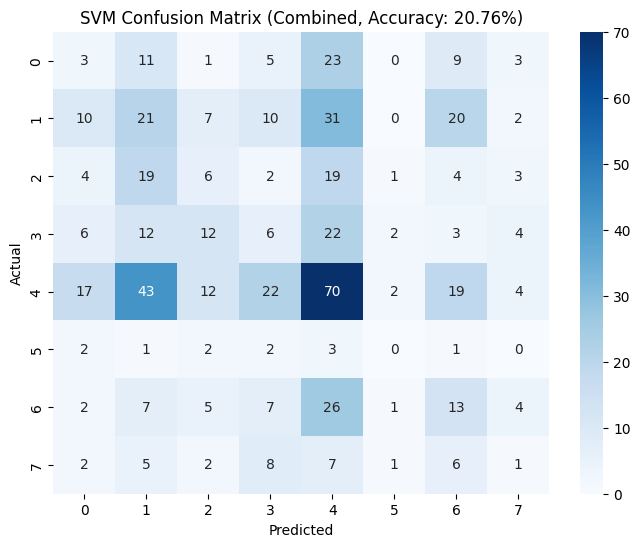

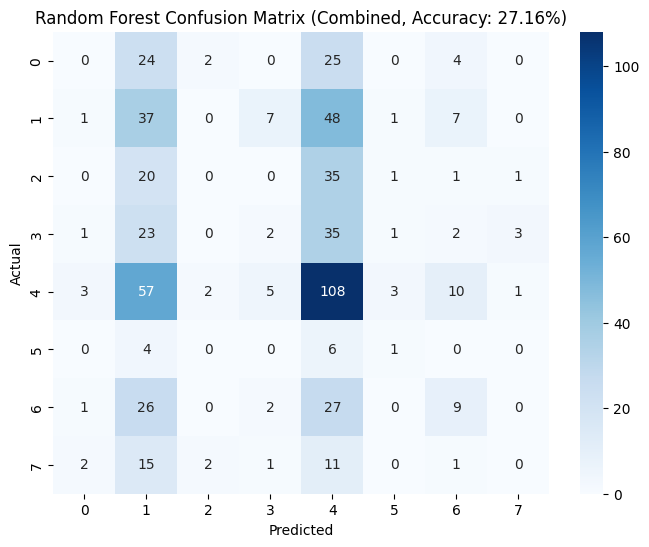

In [ ]:
# Import required libraries for metrics and plotting
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# SVM Classifier (Combined Features)
svm_predictions_combined = svm_classifier_combined.predict(val_features_combined)
test_accuracy_svm_combined = accuracy_score(val_labels_fc6, svm_predictions_combined)
confusion_matrix_svm_combined = confusion_matrix(val_labels_fc6, svm_predictions_combined)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm_combined, annot=True, fmt='d', cmap='Blues')
plt.title(f"SVM Confusion Matrix (Combined, Accuracy: {test_accuracy_svm_combined * 100:.2f}%)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Classifier (Combined Features)
rf_predictions_combined = rf_classifier_combined.predict(val_features_combined)
test_accuracy_rf_combined = accuracy_score(val_labels_fc6, rf_predictions_combined)
confusion_matrix_rf_combined = confusion_matrix(val_labels_fc6, rf_predictions_combined)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf_combined, annot=True, fmt='d', cmap='Blues')
plt.title(f"Random Forest Confusion Matrix (Combined, Accuracy: {test_accuracy_rf_combined * 100:.2f}%)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Test Accuracy with SVM (fc8): 19.20%


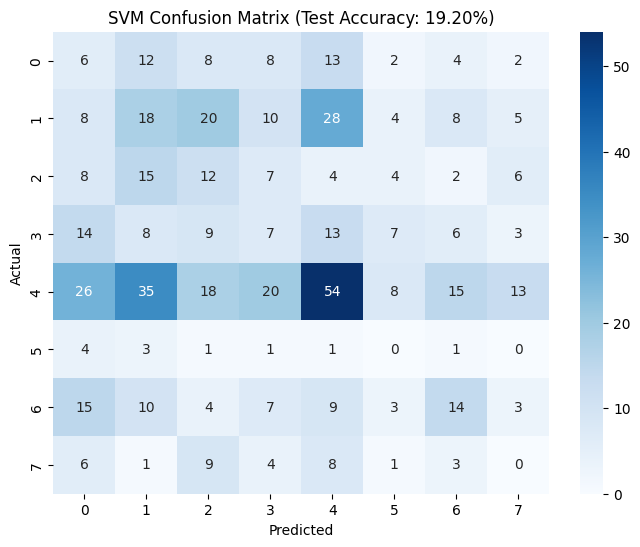

Validation Accuracy with Random Forest (fc8): 27.68%


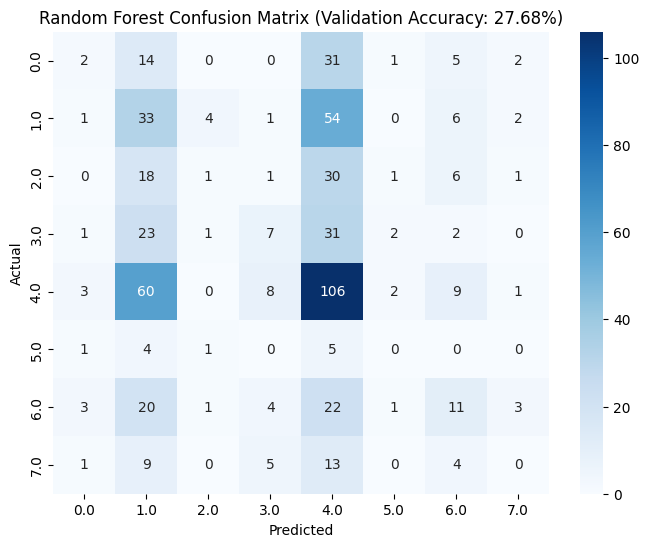

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
svm_predictions_fc8 = svm_classifier_fc8.predict(val_features_fc8)

test_accuracy_svm_fc8 = accuracy_score(val_labels_fc8, svm_predictions_fc8)
print(f"Test Accuracy with SVM (fc8): {test_accuracy_svm_fc8 * 100:.2f}%")

confusion_matrix_svm_fc8 = confusion_matrix(val_labels_fc8, svm_predictions_fc8)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm_fc8, annot=True, fmt='d', cmap='Blues')
plt.title(f"SVM Confusion Matrix (Test Accuracy: {test_accuracy_svm_fc8 * 100:.2f}%)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Use the trained Random Forest classifier to predict the labels for the validation dataset
rf_predictions_fc8 = rf_classifier_fc8.predict(val_features_fc8)

# Calculate the accuracy score of the Random Forest classifier on the validation dataset
test_accuracy_rf_fc8 = accuracy_score(val_labels_fc8, rf_predictions_fc8)
print(f"Validation Accuracy with Random Forest (fc8): {test_accuracy_rf_fc8 * 100:.2f}%")

# Create the confusion matrix for the validation set predictions
confusion_matrix_rf_fc8 = confusion_matrix(val_labels_fc8, rf_predictions_fc8)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf_fc8, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(val_labels_fc8), yticklabels=np.unique(val_labels_fc8))
plt.title(f"Random Forest Confusion Matrix (Validation Accuracy: {test_accuracy_rf_fc8 * 100:.2f}%)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#ml classifiers on fc8 only
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import tensorflow as tf
import os

# Load the base model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Define L2 regularization factor
l2_factor = 0.1

# Create a model to extract features from fc8 with L2 regularization
feature_model_fc8 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu', name='fc6', kernel_regularizer=regularizers.l2(l2_factor)),
    layers.Dense(4096, activation='relu', name='fc7', kernel_regularizer=regularizers.l2(l2_factor)),
    layers.Dense(1000, activation='relu', name='fc8', kernel_regularizer=regularizers.l2(l2_factor))
])

# Compile the model
feature_model_fc8.compile(optimizer='adam', loss='mse')

# Function to generate data excluding system folders like `.ipynb_checkpoints`
def generator_without_checkpoints(base_dir, target_size, batch_size, class_mode):
    subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and not d.startswith('.')]
    return ImageDataGenerator(rescale=1./255).flow_from_directory(
        base_dir,
        classes=subdirectories,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )

# Create data generators using the generator_without_checkpoints function
train_generator = generator_without_checkpoints(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

val_generator = generator_without_checkpoints(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

# Function to extract features and labels from a generator
def extract_features(generator, model):
    features = []
    labels = []
    for i in range(len(generator)):
        x_batch, y_batch = next(generator)
        batch_features = model.predict(x_batch)
        features.extend(batch_features)
        labels.extend(y_batch)
    return np.array(features), np.array(labels)

# Extract features from fc8
train_features_fc8, train_labels_fc8 = extract_features(train_generator, feature_model_fc8)
val_features_fc8, val_labels_fc8 = extract_features(val_generator, feature_model_fc8)

# Train classifiers

# SVM for fc8 features
svm_classifier_fc8 = make_pipeline(StandardScaler(), svm.SVC(kernel='linear', C=1.0))
svm_classifier_fc8.fit(train_features_fc8, train_labels_fc8)

# Random Forest for fc8 features
rf_classifier_fc8 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_fc8.fit(train_features_fc8, train_labels_fc8)

# Evaluate the classifiers on the validation set

# SVM for fc8 features
val_accuracy_svm_fc8 = svm_classifier_fc8.score(val_features_fc8, val_labels_fc8)
print(f"Validation Accuracy with SVM (fc8): {val_accuracy_svm_fc8 * 100:.2f}%")

# Random Forest for fc8 features
val_accuracy_rf_fc8 = rf_classifier_fc8.score(val_features_fc8, val_labels_fc8)
print(f"Validation Accuracy with Random Forest (fc8): {val_accuracy_rf_fc8 * 100:.2f}%")


Found 5139 images belonging to 8 classes.
Found 578 images belonging to 8 classes.
1/1 [==============================] - 0s 19ms/step
Validation Accuracy with SVM (fc8): 20.93%
Validation Accuracy with Random Forest (fc8): 25.95%


In [27]:
#ml classifiers on fc6, 7, 8
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, regularizers
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import tensorflow as tf
import os

# Load the base model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Define L2 regularization factor
l2_factor = 0.1

# Create models to extract features from fc6, fc7, and fc8 with L2 regularization
feature_model_fc6 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu', name='fc6', kernel_regularizer=regularizers.l2(l2_factor))
])

feature_model_fc7 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu', name='fc6', kernel_regularizer=regularizers.l2(l2_factor)),
    layers.Dense(4096, activation='relu', name='fc7', kernel_regularizer=regularizers.l2(l2_factor))
])

feature_model_fc8 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu', name='fc6', kernel_regularizer=regularizers.l2(l2_factor)),
    layers.Dense(4096, activation='relu', name='fc7', kernel_regularizer=regularizers.l2(l2_factor)),
    layers.Dense(1000, activation='relu', name='fc8', kernel_regularizer=regularizers.l2(l2_factor))
])

# Compile the models
for model in [feature_model_fc6, feature_model_fc7, feature_model_fc8]:
    model.compile(optimizer='adam', loss='mse')

# Function to generate data excluding system folders like `.ipynb_checkpoints`
def generator_without_checkpoints(base_dir, target_size, batch_size, class_mode):
    subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and not d.startswith('.')]
    return ImageDataGenerator(rescale=1./255).flow_from_directory(
        base_dir,
        classes=subdirectories,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )

# Create data generators using the generator_without_checkpoints function
train_generator = generator_without_checkpoints(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

val_generator = generator_without_checkpoints(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

# Function to extract features and labels from a generator
def extract_features(generator, model):
    features = []
    labels = []
    for i in range(len(generator)):
        x_batch, y_batch = next(generator)
        batch_features = model.predict(x_batch)
        features.extend(batch_features)
        labels.extend(y_batch)
    return np.array(features), np.array(labels)

# Extract features from fc6, fc7, and fc8
train_features_fc6, train_labels_fc6 = extract_features(train_generator, feature_model_fc6)
val_features_fc6, val_labels_fc6 = extract_features(val_generator, feature_model_fc6)

train_features_fc7, train_labels_fc7 = extract_features(train_generator, feature_model_fc7)
val_features_fc7, val_labels_fc7 = extract_features(val_generator, feature_model_fc7)

train_features_fc8, train_labels_fc8 = extract_features(train_generator, feature_model_fc8)
val_features_fc8, val_labels_fc8 = extract_features(val_generator, feature_model_fc8)

# Concatenate features from all three layers for training
train_features_combined = np.hstack([train_features_fc6, train_features_fc7, train_features_fc8])
val_features_combined = np.hstack([val_features_fc6, val_features_fc7, val_features_fc8])

# Train classifiers (replace or add other ML models as needed)

# SVM for combined features
svm_classifier_combined = make_pipeline(StandardScaler(), svm.SVC(kernel='linear', C=1.0))
svm_classifier_combined.fit(train_features_combined, train_labels_fc6)

# Random Forest for combined features
rf_classifier_combined = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_combined.fit(train_features_combined, train_labels_fc6)

# Evaluate the classifiers on the validation set

# SVM for combined features
val_accuracy_svm_combined = svm_classifier_combined.score(val_features_combined, val_labels_fc6)
print(f"Validation Accuracy with SVM (Combined): {val_accuracy_svm_combined * 100:.2f}%")

# Random Forest for combined features
val_accuracy_rf_combined = rf_classifier_combined.score(val_features_combined, val_labels_fc6)
print(f"Validation Accuracy with Random Forest (Combined): {val_accuracy_rf_combined * 100:.2f}%")


Found 5139 images belonging to 8 classes.
Found 578 images belonging to 8 classes.
1/1 [==============================] - 0s 32ms/step
Validation Accuracy with SVM (Combined): 15.57%
Validation Accuracy with Random Forest (Combined): 22.32%


In [28]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the data generators
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale the pixel values
val_datagen = ImageDataGenerator(rescale=1./255)  # Rescale the pixel values for validation data

def generator_without_checkpoints(base_dir, target_size, batch_size, class_mode):
    subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and not d.startswith('.')]
    return ImageDataGenerator(rescale=1./255).flow_from_directory(
        base_dir,
        classes=subdirectories,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )

# Create data generators using the generator_without_checkpoints function
train_generator = generator_without_checkpoints(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

val_generator = generator_without_checkpoints(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

# For example, getting one batch of training data
X_batch, y_batch = next(train_generator)
X_test, y_test = next(val_generator)

Found 5139 images belonging to 8 classes.
Found 578 images belonging to 8 classes.


In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from kerastuner.tuners import RandomSearch


def build_model(hp):
    # Load the VGG16 model pre-trained on ImageNet
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    # Set the trainable layers
    for layer in base_model.layers:
        layer.trainable = False

    # Unfreeze the last few convolutional layers
    for layer in base_model.layers[-4:]:
        layer.trainable = True

    model = Sequential([
        base_model,
        Flatten(),
        Dense(hp.Int('num_neurons', min_value=128, max_value=1024, step=128), activation='relu'),
        Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(8, activation='softmax')  # Assuming 8 classes
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=hp.Choice('learning_rate', values=[1e-4, 1e-5, 1e-6, 1e-7])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # Number of variations on the hyperparameters
    executions_per_trial=1,  # Runs per trial
    directory='my_dir',  # Directory to save logs
    project_name='hparam_tuning'
)

# Define early stopping to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Start the tuning process
tuner.search(X_batch, y_batch, epochs=40, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The best number of units in the first densely-connected layer is {best_hps.get('num_neurons')} and
the best learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model.
loss, accuracy = best_model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


Trial 20 Complete [00h 00m 06s]
val_accuracy: 0.3076923191547394

Best val_accuracy So Far: 0.3076923191547394
Total elapsed time: 00h 03m 44s

The best number of units in the first densely-connected layer is 128 and
the best learning rate for the optimizer is 0.0001.

2/2 [==============================] - 1s 50ms/step - loss: 2.5524 - accuracy: 0.1094
Test accuracy: 0.109375


In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
import keras_tuner as kt

def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    for layer in base_model.layers[-4:]:
        layer.trainable = True

    model = Sequential([
        base_model,
        Flatten(),
        Dense(hp.Int('num_neurons', min_value=128, max_value=1024, step=128), activation='relu'),
        Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(8, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=hp.Choice('learning_rate', values=[1e-4, 1e-5, 1e-6, 1e-7])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hparam_tuning'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Start the tuning process, incorporating batch size as a hyperparameter
tuner.search(X_batch, y_batch,  # Ensure these are your training data variables
             validation_data=(X_test, y_test),  # Ensure these are your validation data variables
             epochs=40,  # Fixed number of epochs for each trial
             callbacks=[stop_early],
             batch_size=tuner.get_best_hyperparameters()[0].Int('batch_size', min_value=16, max_value=128, step=16))  # Batch size tuning

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The best number of neurons in the first densely-connected layer is {best_hps.get('num_neurons')},
the best learning rate for the optimizer is {best_hps.get('learning_rate')}, and
the best batch size is {best_hps.get('batch_size')}.
""")

best_model = tuner.get_best_models(num_models=1)[0]
loss, accuracy = best_model.evaluate(X_test, y_test)  # Ensure X_test and y_test are defined
print('Test accuracy:', accuracy)


Reloading Tuner from my_dir/hparam_tuning/tuner0.json

The best number of neurons in the first densely-connected layer is 128,
the best learning rate for the optimizer is 0.0001, and
the best batch size is 16.

2/2 [==============================] - 1s 60ms/step - loss: 2.5524 - accuracy: 0.1094
Test accuracy: 0.109375


In [37]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Adding custom top layers for our specific dataset
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax', kernel_regularizer=regularizers.l2(0.1))
])

# Setup learning rate schedule using ExponentialDecay
initial_learning_rate = 1e-4
learning_rate_decay = 1e-6
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=100000,
    decay_rate=1 - learning_rate_decay,
    staircase=True)

# Compile the model using the Adam optimizer with the learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

# Function to generate data excluding system folders like `.ipynb_checkpoints`
def generator_without_checkpoints(base_dir, target_size, batch_size, class_mode):
    subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and not d.startswith('.')]
    return ImageDataGenerator(rescale=1./255).flow_from_directory(
        base_dir,
        classes=subdirectories,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )

# Example Usage
train_generator = generator_without_checkpoints(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='sparse'
)

val_generator = generator_without_checkpoints(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='sparse'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping]
)



Found 5139 images belonging to 8 classes.
Found 578 images belonging to 8 classes.
Epoch 1/20
321/321 [==============================] - 52s 142ms/step - loss: 9.4190 - accuracy: 0.1991 - val_loss: 3.9337 - val_accuracy: 0.3229
Epoch 2/20
321/321 [==============================] - 46s 143ms/step - loss: 3.3477 - accuracy: 0.2340 - val_loss: 2.8803 - val_accuracy: 0.2951
Epoch 3/20
321/321 [==============================] - 45s 140ms/step - loss: 2.7151 - accuracy: 0.2376 - val_loss: 2.4413 - val_accuracy: 0.3281
Epoch 4/20
321/321 [==============================] - 45s 141ms/step - loss: 2.4285 - accuracy: 0.2432 - val_loss: 2.2384 - val_accuracy: 0.3212
Epoch 5/20
321/321 [==============================] - 47s 147ms/step - loss: 2.2624 - accuracy: 0.2405 - val_loss: 2.1139 - val_accuracy: 0.3194
Epoch 6/20
321/321 [==============================] - 45s 141ms/step - loss: 2.1712 - accuracy: 0.2424 - val_loss: 2.0666 - val_accuracy: 0.3108
Epoch 7/20
321/321 [===========================

In [38]:
#accuracy on test set

test_dir = '/content/drive/MyDrive/label55/test'
test_generator = generator_without_checkpoints(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

# Evaluate the Model on the Test Dataset
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 577 images belonging to 8 classes.
9/9 [==============================] - 7s 738ms/step - loss: 1.9149 - accuracy: 0.3194
Test Loss: 1.9148916006088257
Test Accuracy: 0.3194444477558136
